In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import utils
from vgg.imagenet_classes import class_names
from vgg.VGG import generate_VGG16

In [3]:
print("TensorFlow version : {}".format(tf.__version__))
print("Devices : {}".format(utils.get_tensorflow_devices()))

TensorFlow version : 1.1.0
Devices : [('/cpu:0', 'CPU'), ('/gpu:0', 'GPU')]


In [4]:
IMG_W = 224
IMG_H = 224
CHANNELS = 3

MODEL_WEIGHTS = 'vgg/vgg16.npy'

LOG_DIR = 'logs/'

CONTENT_IMAGE = 'images/golden_retriever.jpg'

In [5]:
if tf.gfile.Exists(LOG_DIR):
    tf.gfile.DeleteRecursively(LOG_DIR)
    
tf.gfile.MakeDirs(LOG_DIR)

In [6]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)

In [7]:
model, vgg_scope = generate_VGG16(weights_file=MODEL_WEIGHTS,
                                  scope="VGG16",
                                  apply_preprocess=True,
                                  remove_top=True,
                                  input_shape=(1, IMG_W, IMG_H, CHANNELS))

(1, 224, 224, 3)


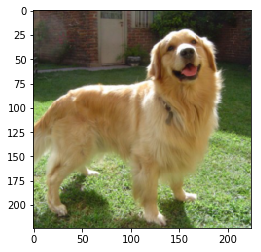

In [8]:
content_image = utils.load_image(CONTENT_IMAGE,expand_dim=True)
print(content_image.shape)
plt.imshow(content_image[0])

In [9]:
def content_loss(sess, model, layer):
    
    def _loss(p, x):
        # N is the number of filters (at layer l).
        N = p.shape[3]
        # M is the height times the width of the feature map (at layer l).
        M = p.shape[1] * p.shape[2]
        return (1 / (4 * M * N)) * tf.reduce_sum(tf.pow(x - p, 2))
    
    return _loss(sess.run(model[layer]), model[layer])

In [10]:
def generate_noise_image():
    """
    Returns a noise image intermixed with the content image at a certain ratio.
    """
    noise_image = np.random.uniform(-20, 20, (1, IMG_H, IMG_W, CHANNELS)).astype('float32')
    return noise_image

(1, 224, 224, 3)


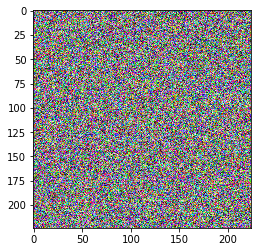

In [11]:
input_image = generate_noise_image()
print(input_image.shape)
plt.imshow(input_image[0])

## Content reconstruction from `conv1_2`

In [12]:
# Construct content_loss using content_image.
sess.run(tf.global_variables_initializer())
sess.run(model['input'].assign(content_image))

with tf.name_scope("content_loss"):
    loss = content_loss(sess, model, 'conv1_2')
    tf.summary.scalar('loss', loss)
    optimizer = tf.train.AdamOptimizer(2.0)
    train_step = optimizer.minimize(loss)

In [13]:
input_image = generate_noise_image()
sess.run(tf.global_variables_initializer())
_ = sess.run(model['input'].assign(input_image))
merged = tf.summary.merge_all()

In [14]:
writer = tf.summary.FileWriter(LOG_DIR, sess.graph)

In [15]:
%%time

ITERATIONS = 4000

for it in range(ITERATIONS):
    _, summary = sess.run([train_step, merged])
    writer.add_summary(summary, it)
    if it%500 == 0:
        _image = sess.run(model['input'])
        print('Iteration %d' % (it))
        print('cost: ', sess.run(loss))
        filename = 'output/conv1_2_iter{}.png'.format(it)
        utils.save_image(filename, _image)
        
        
_image = sess.run(model['input'])
print('Iteration %d' % (it))
print('cost: ', sess.run(loss))
filename = 'output/conv1_2_iter{}.png'.format(it)
utils.save_image(filename, _image)

Iteration 0
cost:  8608.63
Iteration 500
cost:  1.38555
Iteration 1000
cost:  0.322447
Iteration 1500
cost:  0.137964
Iteration 2000
cost:  0.0714209
Iteration 2500
cost:  0.0422546
Iteration 3000
cost:  0.0295116
Iteration 3500
cost:  0.0192221
Iteration 3999
cost:  0.0150719
CPU times: user 19.5 s, sys: 12.5 s, total: 32.1 s
Wall time: 30.1 s


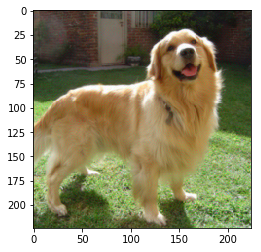

In [16]:
_image = _image[0]
_image = np.clip(_image, 0, 255).astype('uint8')
plt.imshow(_image)

In [17]:
# stop tensorboard monitoring
writer.close()

## Content reconstruction from `conv2_2`

In [18]:
# Construct content_loss using content_image.
sess.run(tf.global_variables_initializer())
sess.run(model['input'].assign(content_image))

with tf.name_scope("content_loss"):
    loss = content_loss(sess, model, 'conv2_2')
    optimizer = tf.train.AdamOptimizer(2.0)
    train_step = optimizer.minimize(loss)

In [19]:
input_image = generate_noise_image()
sess.run(tf.global_variables_initializer())
_ = sess.run(model['input'].assign(input_image))

In [20]:
%%time

ITERATIONS = 4000

for it in range(ITERATIONS):
    sess.run(train_step)
    if it%500 == 0:
        _image = sess.run(model['input'])
        print('Iteration %d' % (it))
        print('cost: ', sess.run(loss))
        filename = 'output/conv2_2_iter{}.png'.format(it)
        utils.save_image(filename, _image)
        
_image = sess.run(model['input'])
print('Iteration %d' % (it))
print('cost: ', sess.run(loss))
filename = 'output/conv2_2_iter{}.png'.format(it)
utils.save_image(filename, _image)

Iteration 0
cost:  31592.7
Iteration 500
cost:  360.885
Iteration 1000
cost:  12.0811
Iteration 1500
cost:  3.28704
Iteration 2000
cost:  1.7274
Iteration 2500
cost:  1.42507
Iteration 3000
cost:  1.08592
Iteration 3500
cost:  1.18342
Iteration 3999
cost:  1.22028
CPU times: user 25.6 s, sys: 18.4 s, total: 44 s
Wall time: 43.6 s


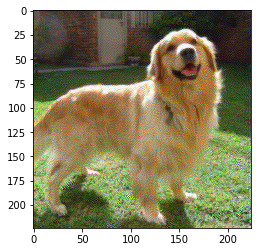

In [21]:
_image = _image[0]
_image = np.clip(_image, 0, 255).astype('uint8')
plt.imshow(_image)

## Content reconstruction from `conv3_3`

In [22]:
# Construct content_loss using content_image.
sess.run(tf.global_variables_initializer())
sess.run(model['input'].assign(content_image))

with tf.name_scope("content_loss"):
    loss = content_loss(sess, model, 'conv3_3')
    optimizer = tf.train.AdamOptimizer(2.0)
    train_step = optimizer.minimize(loss)

In [23]:
input_image = generate_noise_image()
sess.run(tf.global_variables_initializer())
_ = sess.run(model['input'].assign(input_image))

In [24]:
%%time

ITERATIONS = 10000

for it in range(ITERATIONS):
    sess.run(train_step)
    if it%1000 == 0:
        _image = sess.run(model['input'])
        print('Iteration %d' % (it))
        print('cost: ', sess.run(loss))
        filename = 'output/conv3_3_iter{}.png'.format(it)
        utils.save_image(filename, _image)
        
_image = sess.run(model['input'])
print('Iteration %d' % (it))
print('cost: ', sess.run(loss))
filename = 'output/conv3_3_iter{}.png'.format(it)
utils.save_image(filename, _image)

Iteration 0
cost:  41064.9
Iteration 1000
cost:  343.487
Iteration 2000
cost:  48.9515
Iteration 3000
cost:  29.7932
Iteration 4000
cost:  10.4112
Iteration 5000
cost:  8.77535
Iteration 6000
cost:  8.60858
Iteration 7000
cost:  89.5876
Iteration 8000
cost:  5.45833
Iteration 9000
cost:  7.63762
Iteration 9999
cost:  26.1239
CPU times: user 1min 38s, sys: 1min 12s, total: 2min 50s
Wall time: 2min 49s


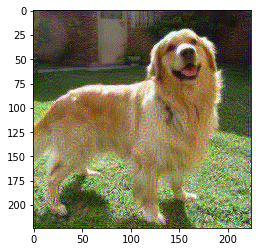

In [25]:
_image = _image[0]
_image = np.clip(_image, 0, 255).astype('uint8')
plt.imshow(_image)

## Content reconstruction from `conv4_3`

In [26]:
# Construct content_loss using content_image.
sess.run(tf.global_variables_initializer())
sess.run(model['input'].assign(content_image))

with tf.name_scope("content_loss"):
    loss = content_loss(sess, model, 'conv4_3')
    optimizer = tf.train.AdamOptimizer(2.0)
    train_step = optimizer.minimize(loss)

In [27]:
input_image = generate_noise_image()
sess.run(tf.global_variables_initializer())
_ = sess.run(model['input'].assign(input_image))

In [28]:
%%time

ITERATIONS = 10000

for it in range(ITERATIONS):
    sess.run(train_step)
    if it%1000 == 0:
        _image = sess.run(model['input'])
        print('Iteration %d' % (it))
        print('cost: ', sess.run(loss))
        filename = 'output/conv4_3_iter{}.png'.format(it)
        utils.save_image(filename, _image)
        
_image = sess.run(model['input'])
print('Iteration %d' % (it))
print('cost: ', sess.run(loss))
filename = 'output/conv4_3_iter{}.png'.format(it)
utils.save_image(filename, _image)

Iteration 0
cost:  2011.89
Iteration 1000
cost:  16.8095
Iteration 2000
cost:  10.0117
Iteration 3000
cost:  6.69135
Iteration 4000
cost:  5.07233
Iteration 5000
cost:  4.86134
Iteration 6000
cost:  5.52025
Iteration 7000
cost:  2.83073
Iteration 8000
cost:  2.31116
Iteration 9000
cost:  1.93544
Iteration 9999
cost:  1.64933
CPU times: user 2min 34s, sys: 1min 54s, total: 4min 28s
Wall time: 4min 26s


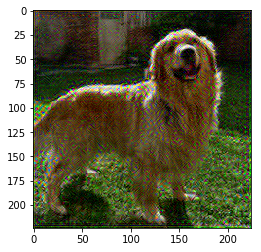

In [29]:
_image = _image[0]
_image = np.clip(_image, 0, 255).astype('uint8')
plt.imshow(_image)

## Content reconstruction from `conv5_3`

In [30]:
# Construct content_loss using content_image.
sess.run(tf.global_variables_initializer())
sess.run(model['input'].assign(content_image))

with tf.name_scope("content_loss"):
    loss = content_loss(sess, model, 'conv5_3')
    optimizer = tf.train.AdamOptimizer(2.0)
    train_step = optimizer.minimize(loss)

In [ ]:
input_image = generate_noise_image()
sess.run(tf.global_variables_initializer())
_ = sess.run(model['input'].assign(input_image))

In [ ]:
%%time

ITERATIONS = 10000

for it in range(ITERATIONS):
    sess.run(train_step)
    if it%1000 == 0:
        _image = sess.run(model['input'])
        print('Iteration %d' % (it))
        print('cost: ', sess.run(loss))
        filename = 'output/conv5_3_iter{}.png'.format(it)
        utils.save_image(filename, _image)
        
        
_image = sess.run(model['input'])
print('Iteration %d' % (it))
print('cost: ', sess.run(loss))
filename = 'output/conv5_3_iter{}.png'.format(it)
utils.save_image(filename, _image)

Iteration 0
cost:  28.998
Iteration 1000
cost:  0.0948069
Iteration 2000
cost:  0.0570356
Iteration 3000
cost:  0.0490469
Iteration 4000
cost:  0.0794974
Iteration 5000
cost:  0.0341967
Iteration 6000
cost:  0.0298862
Iteration 7000
cost:  0.027498
Iteration 8000
cost:  0.0263256


In [ ]:
_image = _image[0]
_image = np.clip(_image, 0, 255).astype('uint8')
plt.imshow(_image)